## 위스콘신 유방암 데이터 악성 예측 - Gold 따라하기 ##
* Feature Selection and Data Visualization

Reference - https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [37]:
data = pd.read_csv(r'C:\Users\user\Desktop\Python Workspace\Kaggle\dataset\wisconsin.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


* ID는 classification에 사용하지 못함
* Diagnosis는 레이블 데이터
* Unnamed: 32 컬럼은 NaN을 포함하고 있으므로 필요하지 않음

In [38]:
#feature names as a list
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [39]:
y = data.diagnosis
list = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(list, axis= 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant:  212


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


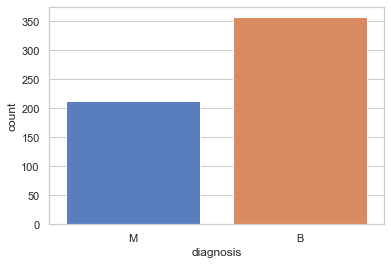

In [40]:
ax = sns.countplot(y, label = 'Count')
B, M = y.value_counts()
print("Number of Benign: ", B)
print("Number of Malignant: ", M)

In [41]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualization ##

* violin & swarm plot으로 시각화
* 시각화 전에 정규화 & 표준화 필요(Why? 각각 피처들의 값들이 그냥 관찰하기엔 매우 크기 때문에)

In [45]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std()) #standardization
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis', var_name= 'features', value_name= 'value')
data

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
...,...,...,...
5685,M,fractal_dimension_mean,-0.930209
5686,M,fractal_dimension_mean,-1.057681
5687,M,fractal_dimension_mean,-0.894800
5688,M,fractal_dimension_mean,1.042778


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

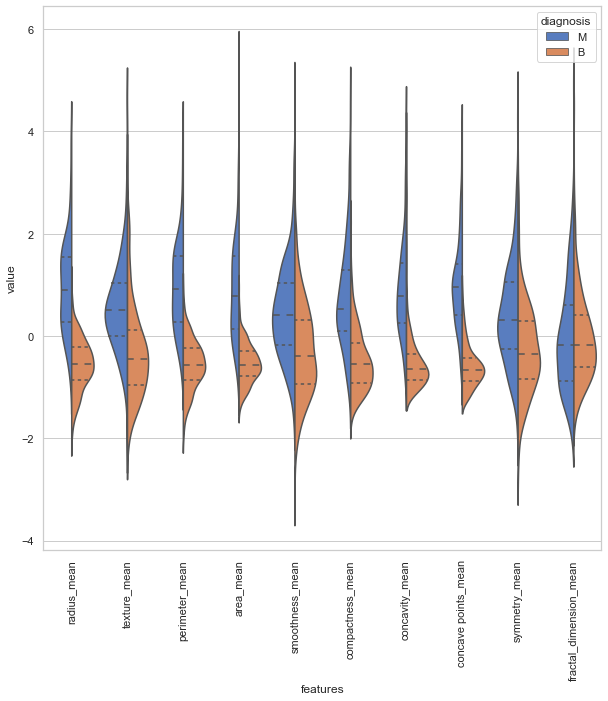

In [34]:
#First 10 features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std()) #standardization
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis', var_name= 'features', value_name= 'value')
plt.figure(figsize=(10, 10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split= True, inner= 'quart')
plt.xticks(rotation = 90)

## Plot 해석 하기
* 예를 들어, text_mean을 봤을 때 M과 B의 Median이 서로 다른 것을 볼 수 있음 -> 좋은 classification이 될 수 있음
* 하지만, fractal_dimension_mean을 봤을 때는 두 개의 Median의 차이가 별로 없으므로 Classification에 있어 좋지 못함

In [35]:
data

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
...,...,...,...
5685,M,fractal_dimension_mean,-0.930209
5686,M,fractal_dimension_mean,-1.057681
5687,M,fractal_dimension_mean,-0.894800
5688,M,fractal_dimension_mean,1.042778


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

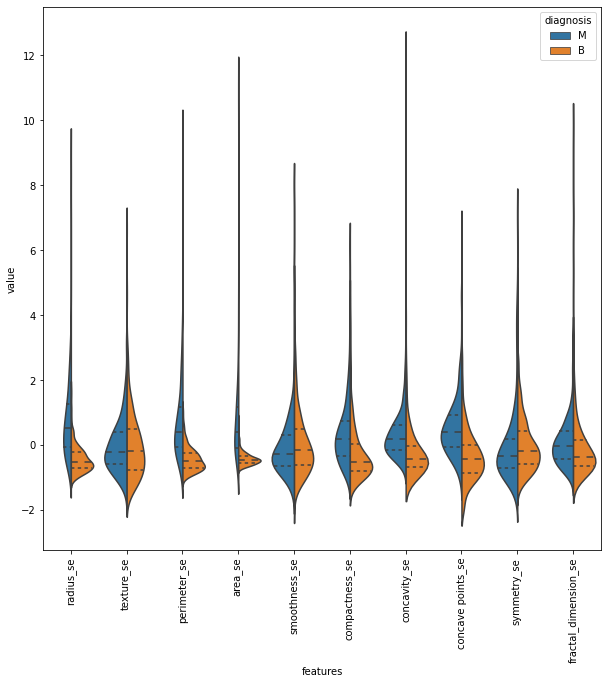

In [8]:
#Second 10 features
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis', var_name= 'features', value_name= 'value')
plt.figure(figsize= (10, 10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

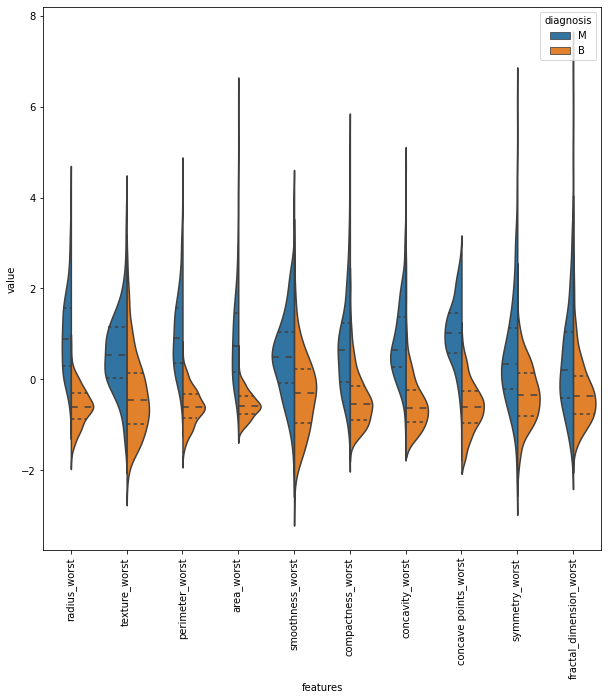

In [9]:
#Third 10 features
data = pd.concat([y, data_n_2.iloc[:, 20:31]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis', var_name= 'features', value_name= 'value')
plt.figure(figsize=(10, 10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split= True, inner= 'quart')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

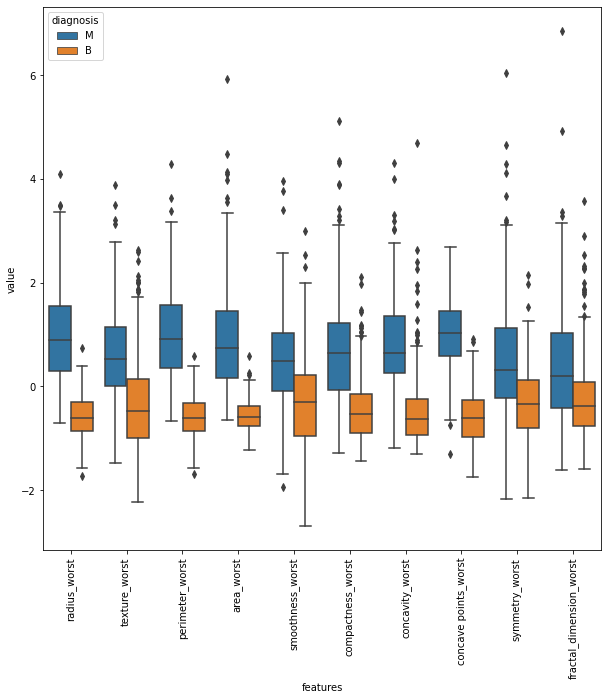

In [10]:
#violin plot 대신 box plot을 그려도 됨
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 90)

## Plot 해석하기
* concavity_worst & concave_point_worst랑 비슷해 보임
* But, 어떻게 이 두 컬럼이 연관성이 있다고 확정지을 수 있나?
* 항상은 아니지만, 만약 두 컬럼이 연관성이 있다고 하면 그 중 하나는 drop

두 개의 컬럼을 조금 더 면밀히 비교하기 위해, joint plot을 사용

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


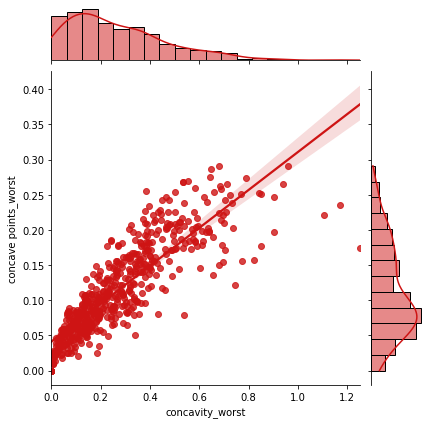

In [11]:
sns.jointplot(x.loc[:, 'concavity_worst'], x.loc[:, 'concave points_worst'], kind = 'reg', color='#ce1414')

* 피어슨 상관계수 = 0.86 -> 강한 양의 상관관계를 가짐

만약 3개 이상의 피처들에 대한 비교를 하고 싶다면? -> pair grid plot


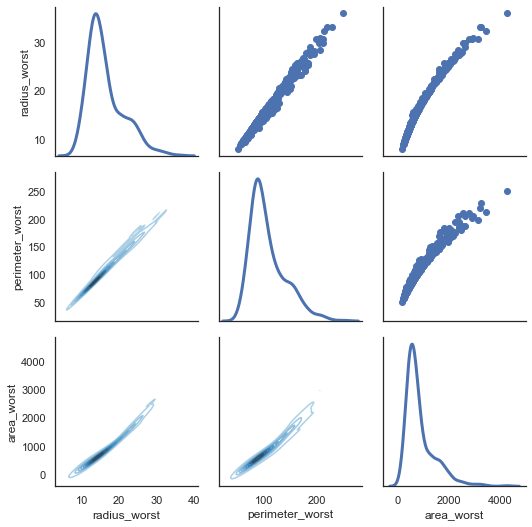

In [12]:
sns.set(style = 'white')
df = x.loc[:, ['radius_worst', 'perimeter_worst', 'area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw= 3)

이 세개의 컬럼이 모두 강한 양의 선형 관계를 보임 -> 이러한 것들을 이용해 feature selection에 사용

swarm plot에서 복잡한 모습을 보이지 않게 하기 위해 violin plot과 같은 세 가지 part를 진행 

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.7% of the points cann

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

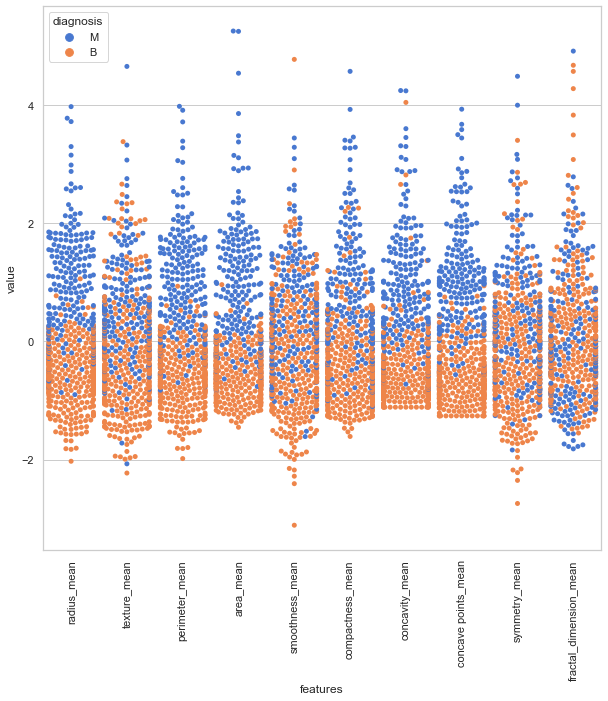

In [13]:
sns.set(style = 'whitegrid', palette = 'muted')
data_dia = y
data = x
data_n_2 = (data - data.mean())/(data.std())
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis', var_name='features', value_name='value') 
plt.figure(figsize=(10, 10))
tic = time.time()
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data= data)
plt.xticks(rotation= 90)

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.6% of the points cann

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

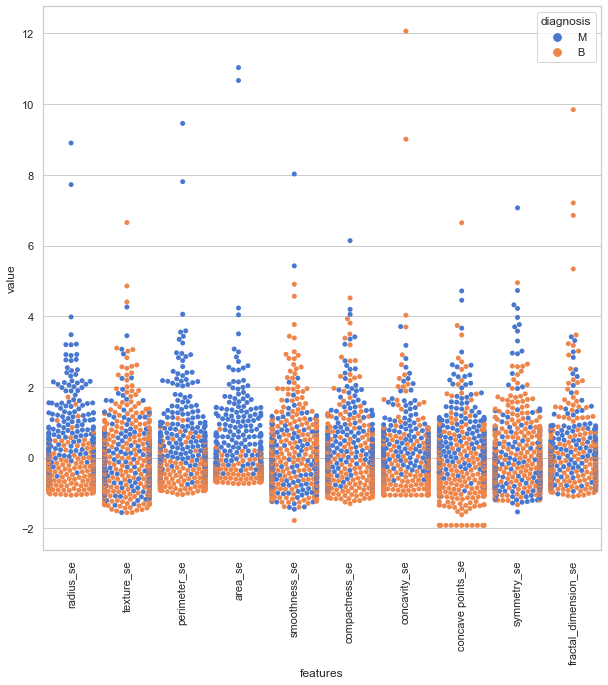

In [14]:
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis', var_name='features', value_name='value') 
plt.figure(figsize=(10, 10))
tic = time.time()
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data= data)
plt.xticks(rotation= 90)

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.6% of the points cann

swarm plot time:  9.98889970779419  s


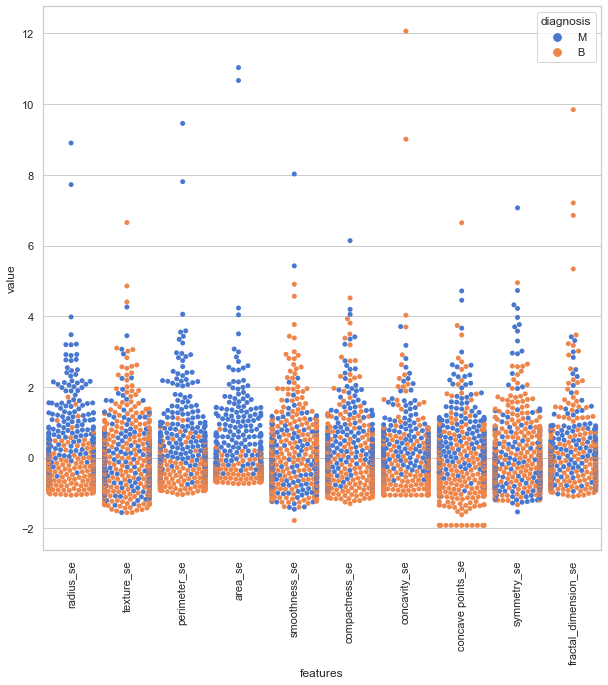

In [15]:
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars= 'diagnosis', var_name='features', value_name='value') 
plt.figure(figsize=(10, 10))
toc = time.time()
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data= data)
plt.xticks(rotation= 90)
print('swarm plot time: ', toc-tic, ' s')

* area_worst : 거의 분리되어 있음
* smoothness_se : 거의 분리되어 있지 않음

만약 모든 피처들의 상관관계를 알고 싶다면 ? -> Heatmap

<AxesSubplot:>

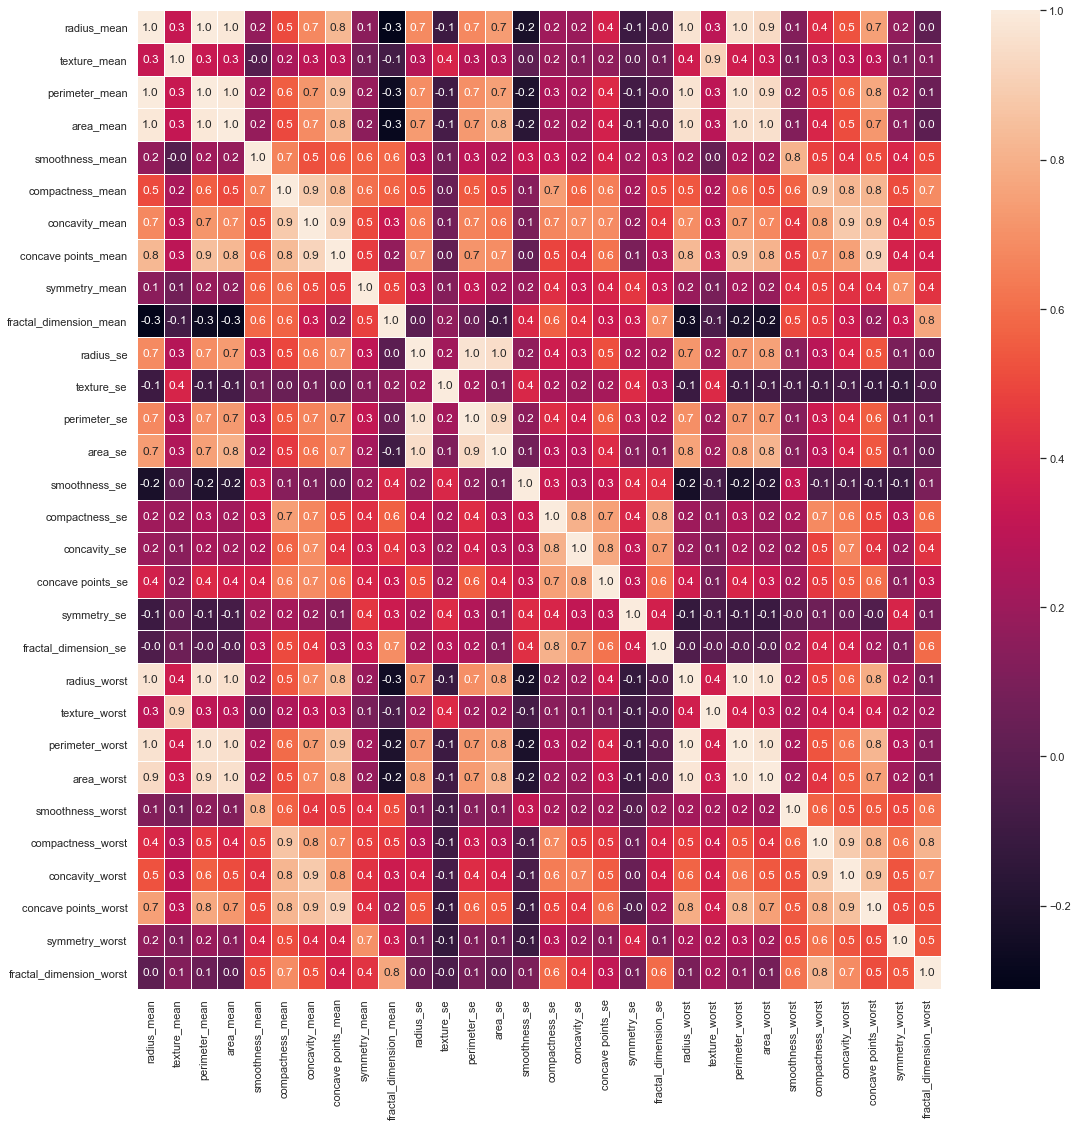

In [16]:
#correlation map
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(x.corr(), annot=True, linewidths= .5, fmt = '.1f', ax =ax)

## Let's choose our drinks at feature selection!!

## Feature Selection and Random Forest Classification
여러 가지 방법을 통해 feature selection 진행
* feature selection with correlation
* univariate feature selection
* recursive feature elimination(RFE)
* recursive feature elimination with cross validation(RFECV)
* tree based feature selection

모델링에는 랜덤 포레스트을 사용

## 1) Feature selection with correlation and random forest classification

앞에서 확인했듯이, radius_mean, perimeter_mean, area_mean은 강한 양의 상관관계 -> area_mean만 사용
* 왜 area_mean을 선택? -> 정확한 정답은 없음
* swarm plot을 봤을 때,  area_mean이 제일 clear 

* Compactness_mean, concavity_mean, concave points_mean 컬럼들이 상관 관계가 있음 -> concavity_mean 선택
* radius_se, perimeter_se, area_se -> area_se
* radius_worst, perimeter_worst, area_worst -> area_worst
* Compactness_worst, concavity_worst, concave points_worst -> concavity_worst
* Compactness_se, concavity_se, concave points_se -> concavity_se
* texture_mean, texture_worst, -> texture_mean
* area_worst, area_mean -> area_mean

In [17]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


drop 후의 Heatmap

<AxesSubplot:>

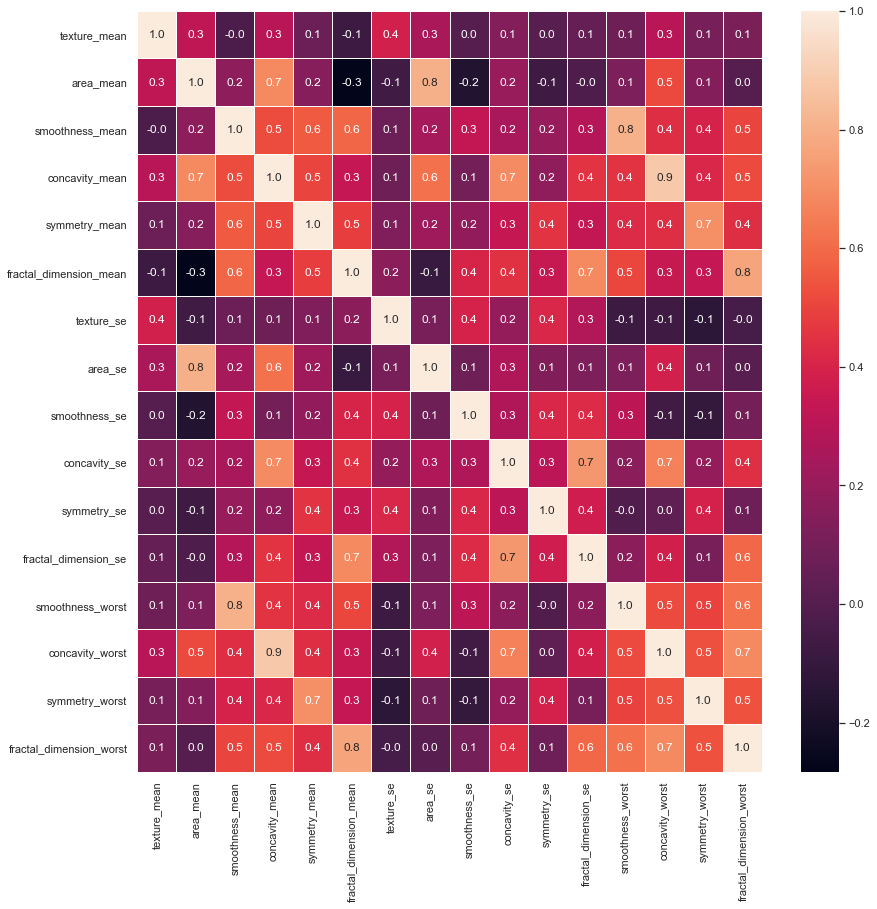

In [18]:
f, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(x_1.corr(), annot= True, linewidths=.5, fmt = '.1f', ax= ax)

상관관계가 0.9인 것들이 있지만 이것을 drop하지 않으면 어떤 일이 발생하는지 확인
* Well, we choose our features but did we choose correctly ? 

Accuracy is:  0.9649122807017544


<AxesSubplot:>

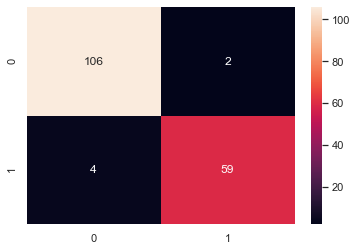

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size= 0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(X_train, y_train)

ac = accuracy_score(y_test, clf_rf.predict(X_test))
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
sns.heatmap(cm, annot= True, fmt = 'd')

## 2) Univariate feature selection and random forest classification

SelectKBest 공식문서 : http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

이 방법에선 얼마나 많은 피처들을 사용할 것인지 선택해야함 -> 정답은 X, 오직 trying & intuitively

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [21]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Best 5 features : area_mean, area_se, texture_mean, concavity_worst and concavity_mean. 

Accuracy is:  0.9590643274853801


<AxesSubplot:>

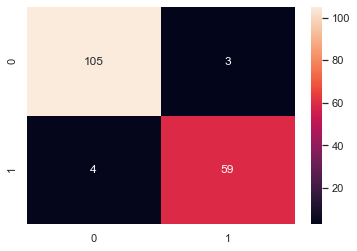

In [22]:
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

## 3) Recursive feature elimination (RFE) with random forest

공식 문서 : http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 

In [23]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [24]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


Best 5 features : texture_mean, area_mean, concavity_mean, area_se, concavity_worst.
* selectKBest 방법과 비슷함
* 왜 5개??????? -> RFECV 방법이 도움이 됨

## 4) Recursive feature elimination with cross validation and random forest classification
공식 문서 : http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

* we will not only find best features but we also find how many features do we need for best accuracy.

In [25]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

KeyboardInterrupt: 

Best 11 features : texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst

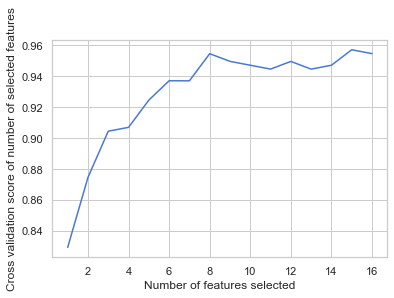

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## 5) Tree based feature selection and random forest classification
공식 문서 : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

## Feature importances method
* 파이썬 머신러닝 완벽 가이드에 내용 있음

Feature ranking:
1. feature 3 (0.251898)
2. feature 1 (0.157621)
3. feature 7 (0.155504)
4. feature 13 (0.126769)
5. feature 0 (0.052672)
6. feature 9 (0.052640)
7. feature 14 (0.045643)
8. feature 12 (0.030713)
9. feature 4 (0.019561)
10. feature 2 (0.018049)
11. feature 11 (0.017005)
12. feature 8 (0.016926)
13. feature 5 (0.016638)
14. feature 15 (0.015000)
15. feature 10 (0.012060)
16. feature 6 (0.011300)


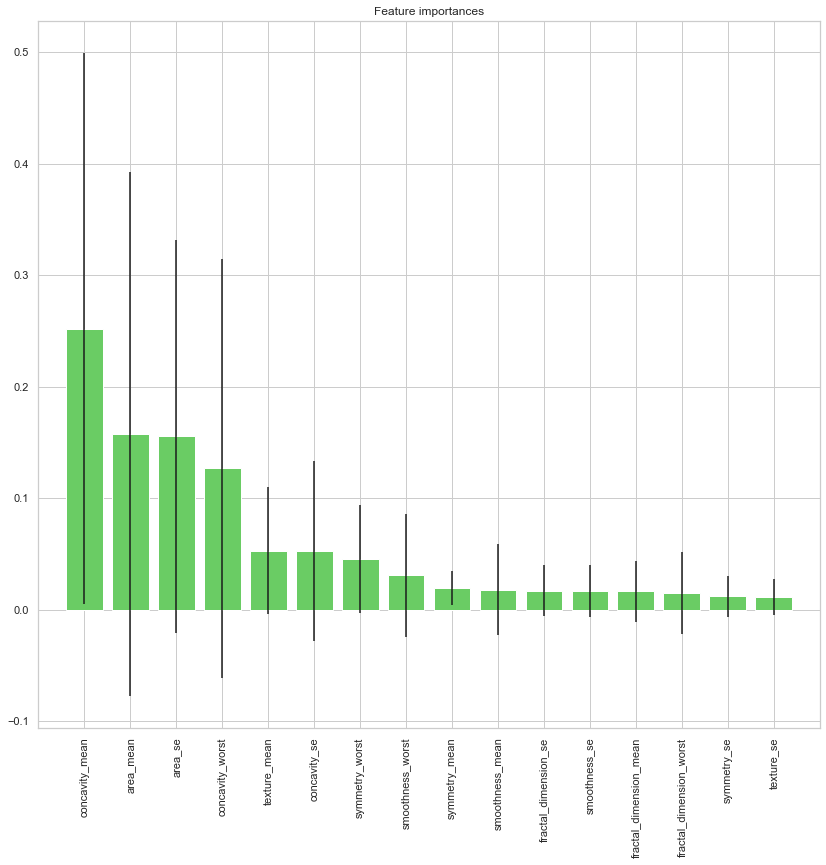

In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()